# Hamoye Capstone project - Winter Olympics

## By Sumit Redekar

### 1. Problem Statement
To predict the type of medal a Country wins (GOLD, BRONZE, SILVER). So the target variable is MEDAL.

### 2. Dataset 
Dataset taken from **Kaggle** - https://www.kaggle.com/the-guardian/olympic-games

### 3. Evaluation
Metrics used to evaluate the model performance are: accuracy, precision and f1 score.

### Getting Started


In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('winter.csv')

In [3]:
data.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold


### Exploratory Data Analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5770 entries, 0 to 5769
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        5770 non-null   int64 
 1   City        5770 non-null   object
 2   Sport       5770 non-null   object
 3   Discipline  5770 non-null   object
 4   Athlete     5770 non-null   object
 5   Country     5770 non-null   object
 6   Gender      5770 non-null   object
 7   Event       5770 non-null   object
 8   Medal       5770 non-null   object
dtypes: int64(1), object(8)
memory usage: 405.8+ KB


In [5]:
data.describe()

,Year
count,5770.000000
mean,1986.350433
std,24.263673
min,1924.000000
25%,1972.000000
50%,1994.000000
75%,2006.000000
max,2014.000000


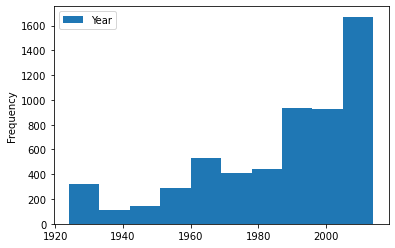

In [6]:
data.plot(kind='hist');

#### Converting categorical features into numeric features with Ordinal Encoding

In [7]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [8]:
#copy of og data
data_tmp = data.copy()

In [9]:
data.columns

Index(['Year', 'City', 'Sport', 'Discipline', 'Athlete', 'Country', 'Gender',
       'Event', 'Medal'],
      dtype='object')

In [10]:
categorical_features = ['City', 'Sport', 'Discipline', 'Athlete', 'Country', 'Gender','Event', 'Medal']
ordinal = OrdinalEncoder()
data_tmp[categorical_features] = ordinal.fit_transform(data[categorical_features])

In [11]:
data_tmp

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,2.0,0.0,1.0,280.0,15.0,0.0,57.0,0.0
1,1924,2.0,0.0,1.0,2075.0,15.0,0.0,57.0,0.0
2,1924,2.0,0.0,1.0,2076.0,15.0,0.0,57.0,0.0
3,1924,2.0,0.0,1.0,3456.0,15.0,0.0,57.0,0.0
4,1924,2.0,0.0,1.0,152.0,36.0,0.0,57.0,1.0
...,...,...,...,...,...,...,...,...,...
5765,2014,14.0,6.0,13.0,1477.0,17.0,1.0,69.0,0.0
5766,2014,14.0,6.0,13.0,77.0,42.0,1.0,69.0,1.0
5767,2014,14.0,6.0,13.0,2067.0,5.0,1.0,70.0,2.0
5768,2014,14.0,6.0,13.0,2882.0,8.0,1.0,70.0,1.0


In [12]:
data_tmp.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5770 entries, 0 to 5769
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        5770 non-null   int64  
 1   City        5770 non-null   float64
 2   Sport       5770 non-null   float64
 3   Discipline  5770 non-null   float64
 4   Athlete     5770 non-null   float64
 5   Country     5770 non-null   float64
 6   Gender      5770 non-null   float64
 7   Event       5770 non-null   float64
 8   Medal       5770 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 405.8 KB


In [13]:
data_tmp.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       0
Gender        0
Event         0
Medal         0
dtype: int64

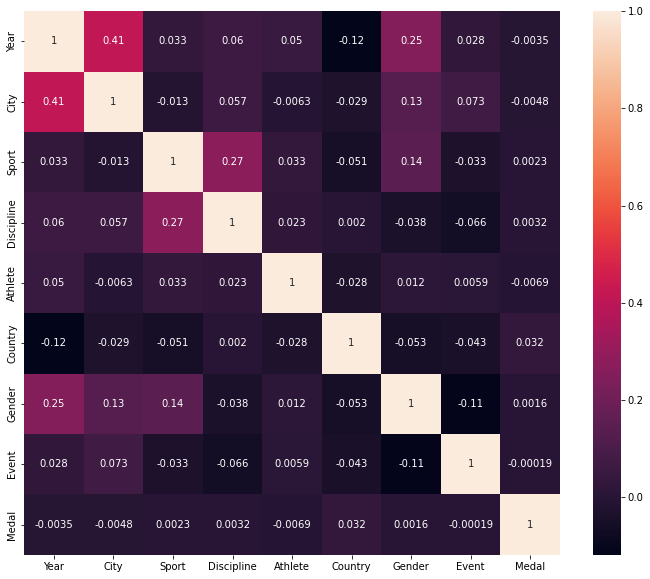

In [14]:
#correlation matrix
corr = data_tmp.corr()
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr, annot=True);

After converting all categorical features into numerical features our data is now ready for modeling

### Modeling

In [15]:
#getting our X and y
X = data_tmp.drop('Medal',axis=1)
y = data_tmp['Medal']

In [16]:
from  sklearn.model_selection import train_test_split

#splitting X and y in training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X_train.shape, y_train.shape

((4616, 8), (4616,))

In [18]:
X_test.shape, y_test.shape

((1154, 8), (1154,))

In [19]:
#scaling features 
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [20]:
#importing models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

In [21]:
#importing metrics 
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve

#### Lazypredict to compare machine learning models

In [22]:
import warnings
warnings.filterwarnings("ignore")

In [23]:
#import
from lazypredict.Supervised import LazyClassifier

#fitting
clf = LazyClassifier(verbose=0, ignore_warnings=True,custom_metric=None, predictions=True)
models,predictions = clf.fit(X_train_scaled, X_test_scaled, y_train, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:07<00:00,  4.03it/s]


In [87]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BaggingClassifier,0.64,0.64,None,0.64,0.11
DecisionTreeClassifier,0.64,0.63,None,0.64,0.02
RandomForestClassifier,0.62,0.62,None,0.62,0.45
ExtraTreesClassifier,0.62,0.62,None,0.62,0.38
XGBClassifier,0.62,0.62,None,0.62,0.47
ExtraTreeClassifier,0.59,0.59,None,0.59,0.01
LGBMClassifier,0.59,0.59,None,0.59,0.22
LabelPropagation,0.55,0.55,None,0.55,0.50
LabelSpreading,0.54,0.54,None,0.54,0.76


These are top five models who performs well :
**BaggingClassifier, DecisionTreeClassifier, RandomForestClassifier, ExtraTreesClassifier, XGBClassifier**  


### Hypertuning

Let's hypertune this models 

#### GridSearchCV for extensive tuning

1. Hyperparameter tuning for **BaggingClassifier**

In [25]:
np.random.seed(42)

#grid
bagging_grid = {
    'n_estimators': [10,20,100,1000],
    'max_samples': [1,2,3],
    'max_features': [1,2,3]
}

#randomizedsearchCv
bagging_rs = GridSearchCV(BaggingClassifier(),bagging_grid,cv=5,verbose=True,n_jobs=-1)
bagging_rs.fit(X_train_scaled,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  41 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   13.2s finished


GridSearchCV(cv=5, estimator=BaggingClassifier(), n_jobs=-1,
             param_grid={'max_features': [1, 2, 3], 'max_samples': [1, 2, 3],
                         'n_estimators': [10, 20, 100, 1000]},
             verbose=True)

In [26]:
bagging_rs.best_params_

{'max_features': 3, 'max_samples': 3, 'n_estimators': 100}

In [27]:
bagging_rs.score(X_test_scaled,y_test)

0.3240901213171577

2. Hyperparameter tuning for **DecisionTreeClassifier**

In [29]:
np.random.seed(42)

#grid
decision_grid = {
    'max_depth': [None, 1,2,3,4],
    'min_samples_split': [1,2,3,4],
    'min_samples_leaf': [1,2,3,4],
    'max_features': ['auto', 'sqrt', 'log2'],

}

#randomizedsearchCv
decision_rs = GridSearchCV(DecisionTreeClassifier(),decision_grid,cv=5,verbose=True,n_jobs=-1)
decision_rs.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:    0.6s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 1, 2, 3, 4],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [1, 2, 3, 4]},
             verbose=True)

In [30]:
decision_rs.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [31]:
decision_rs.score(X_test_scaled,y_test)

0.5849220103986135

3. Hyperparameter tuning for **RandomForestClassifier**

In [32]:
np.random.seed(42)

#grid
random_grid = {
    'n_estimators': [10,20,100,500,900,1000],
    'max_depth': [None, 1,2,3],
    'min_samples_split': [1,2,3,4],
    'min_samples_leaf': [1,2,3,4],
    'max_features': ['auto', 'sqrt', 'log2'],
}

#randomizedsearchCv
random_rs = GridSearchCV(RandomForestClassifier(),random_grid,cv=5,verbose=True,n_jobs=-1)
random_rs.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:   33.7s
[Parallel(n_jobs=-1)]: Done 438 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 788 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1238 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 1788 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 2438 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 3188 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 4038 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 4988 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed: 12.1min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 1, 2, 3],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [1, 2, 3, 4],
                         'n_estimators': [10, 20, 100, 500, 900, 1000]},
             verbose=True)

In [34]:
random_rs.best_params_

{'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [36]:
random_rs.score(X_test_scaled, y_test)

0.6291161178509532

4. Hyperparameter tuning for **ExtraTreeClassifier**

In [41]:
np.random.seed(42)

#grid
extra_grid = {
    'max_depth': [None, 1,2,3],
    'min_samples_split': [1,2,3],
    'min_samples_leaf': [1,2,3],
    'max_features': ['auto', 'sqrt', 'log2'],
}

#randomizedsearchCv
extra_rs = GridSearchCV(ExtraTreeClassifier(),extra_grid,cv=5,verbose=True,n_jobs=-1)
extra_rs.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:    0.3s finished


GridSearchCV(cv=5, estimator=ExtraTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 1, 2, 3],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3]},
             verbose=True)

In [43]:
extra_rs.best_params_

{'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 3}

In [44]:
extra_rs.score(X_test_scaled, y_test)

0.6178509532062392

5. Hyperparameter tuning for **XGBCLassifier**

In [45]:
XGBClassifier().get_params().keys()

dict_keys(['objective', 'base_score', 'booster', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'gamma', 'gpu_id', 'importance_type', 'interaction_constraints', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'missing', 'monotone_constraints', 'n_estimators', 'n_jobs', 'num_parallel_tree', 'random_state', 'reg_alpha', 'reg_lambda', 'scale_pos_weight', 'subsample', 'tree_method', 'validate_parameters', 'verbosity'])

In [46]:
np.random.seed(42)

#grid
xgb_grid = {
    'learning_rate':[0.01,0.1,0.3,1],
    'max_depth': [1,2,3,6],
    'min_child_weight': [1,2,3],
    'max_delta_step': [0,1,2,3]
    
}

#randomizedsearchCv
xgb_rs = GridSearchCV(XGBClassifier(),xgb_grid,cv=5,verbose=True,n_jobs=-1)
xgb_rs.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 438 tasks      | elapsed:   32.1s
[Parallel(n_jobs=-1)]: Done 788 tasks      | elapsed:   57.8s
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:  1.2min finished


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [47]:
xgb_rs.best_params_

{'learning_rate': 1,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1}

In [48]:
xgb_rs.score(X_test_scaled, y_test)

0.5953206239168111

After hypertuning our top models,
 - BaggingClassifier - **0.3240**
 - DecisionTreeClassifier - **0.5849**
 - RandomForestClassifier - **0.6291**
 - ExtraTreeClassifier - **0.6178**
 - XGBClassifier - **0.5953**
 
We can clearly see that our Hypertuned **RandomForestClassifier** performs well compare to other 5 models.

### Evaluating our RandomForestClassifier

In [61]:
#let's fit our model with best parameters
model = RandomForestClassifier(
    max_depth=None, 
    max_features='log2',
    min_samples_leaf=1, 
    min_samples_split=2, 
    n_estimators=1000, 
    random_state=42
)

#fitting our model
model.fit(X_train_scaled, y_train)

#evaluating our model
accuracy = model.score(X_test_scaled, y_test)
accuracy

0.6291161178509532

In [56]:
#predictions
prediction = model.predict(X_test_scaled) 

In [65]:
#recall
recall = recall_score(y_test, prediction, average='micro')
recall

0.6291161178509532

In [63]:
#precision
precision = precision_score(y_test, prediction, average='micro')
precision

0.6291161178509532

In [66]:
#classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

         0.0       0.70      0.66      0.68       386
         1.0       0.61      0.65      0.63       394
         2.0       0.59      0.58      0.58       374

    accuracy                           0.63      1154
   macro avg       0.63      0.63      0.63      1154
weighted avg       0.63      0.63      0.63      1154



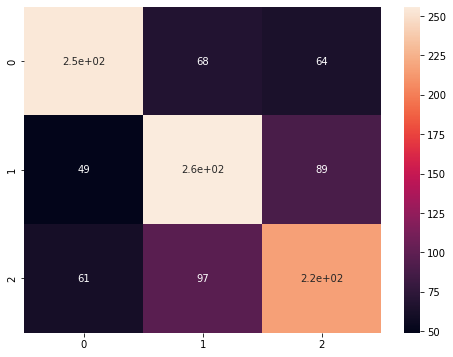

In [73]:
#confusion matrix
corr_matrix = confusion_matrix(y_test, prediction)

#plotting
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True);

### Feature Importance

In [78]:
importances = model.feature_importances_

In [79]:
imp = pd.DataFrame(index=categorical_features)
imp['Importance'] = importances

In [80]:
imp

,Importance
City,0.14
Sport,0.14
Discipline,0.05
Athlete,0.06
Country,0.22
Gender,0.19
Event,0.04
Medal,0.16


<AxesSubplot:title={'center':'Feature Importance'}>

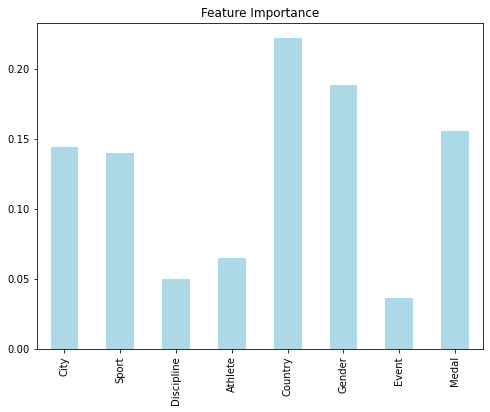

In [86]:
imp.plot.bar(title='Feature Importance',legend=False,color='lightblue',figsize=(8,6))